# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df = pd.read_csv('employee_attrition.csv',header=0)

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [8]:
df=df.drop(['EmployeeNumber'],axis=1)

# Create target feature

In [9]:
df['target']=np.where(df['Attrition']=="Yes",1,0)

In [10]:
df=df.drop(['Attrition'],axis=1)

# Defining Target and Independent Features

In [11]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Attrition (Event) Rate

In [12]:
Y.mean()

target    0.161224
dtype: float64

# Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [14]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [15]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1


In [16]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [17]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [18]:
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [19]:
num.shape

(1470, 8)

In [20]:
char=pd.concat([char,cat],axis=1,join="inner")

In [21]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


# Outlier Analysis of Numerical Features

In [22]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


# Capping and Flooring of outliers

In [23]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [24]:
num=num.apply(lambda x : outlier_cap(x))

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


# Missing Value Analysis

In [26]:
num.isnull().mean()

Age                  0.0
DailyRate            0.0
DistanceFromHome     0.0
HourlyRate           0.0
MonthlyIncome        0.0
MonthlyRate          0.0
TotalWorkingYears    0.0
YearsAtCompany       0.0
dtype: float64

In [27]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [28]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [29]:
num_1.iloc[0]

Age                     41.0
DailyRate             1102.0
DistanceFromHome         1.0
HourlyRate              94.0
MonthlyIncome         5993.0
MonthlyRate          19479.0
TotalWorkingYears        8.0
YearsAtCompany           6.0
Name: 0, dtype: float64

# Part 1 - Bi Variate Analysis (Feature Discretization)

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.tail()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank
1465,5.0,5.0,8.0,1.0,1.0,4.0,7.0,4.0
1466,6.0,3.0,3.0,1.0,8.0,7.0,4.0,5.0
1467,1.0,0.0,2.0,8.0,6.0,1.0,2.0,4.0
1468,8.0,6.0,1.0,4.0,5.0,4.0,7.0,6.0
1469,4.0,3.0,4.0,7.0,4.0,3.0,2.0,3.0


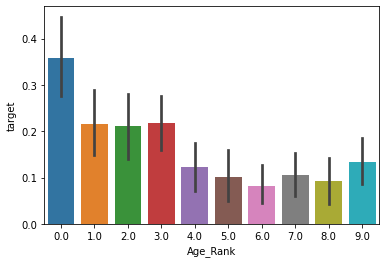

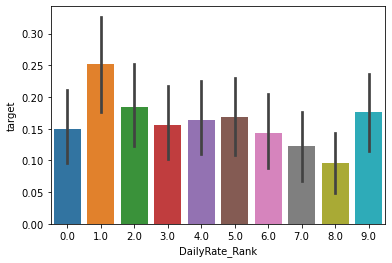

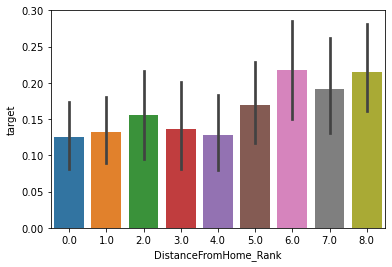

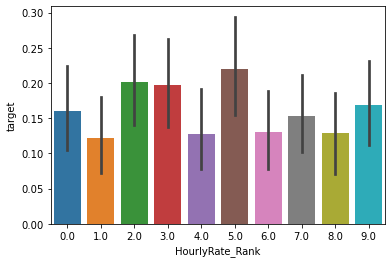

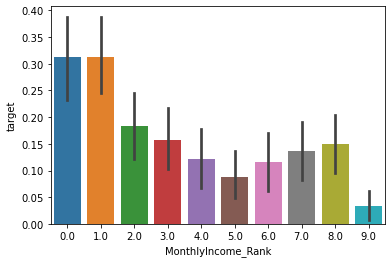

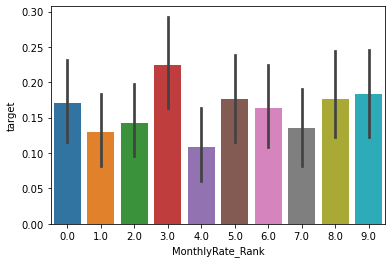

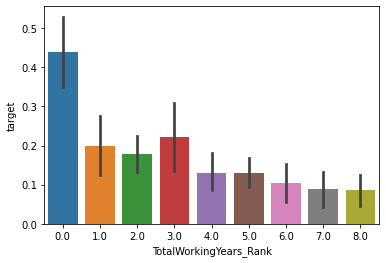

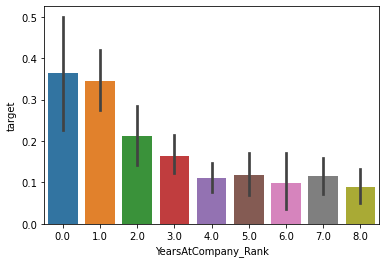

In [31]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=Y.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [32]:
num_varlist=['DailyRate','HourlyRate','MonthlyRate']
num_1=num_1.drop(num_varlist,axis=1)

In [33]:
num_1.dtypes

Age                  float64
DistanceFromHome       int64
MonthlyIncome        float64
TotalWorkingYears      int64
YearsAtCompany         int64
dtype: object

# Part 2 - Select K Best

In [34]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=4)
selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [35]:
select_features_df_num.iloc[0]

Age                    41.0
MonthlyIncome        5993.0
TotalWorkingYears       8.0
YearsAtCompany          6.0
Name: 0, dtype: float64

# Feature Selection - Categorical Features 

In [36]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [37]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

# Part 1 - Bi Variate Analysis

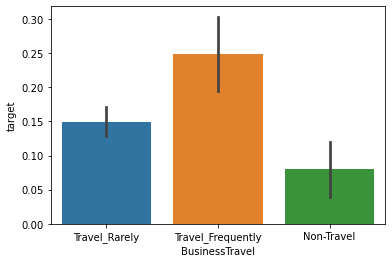

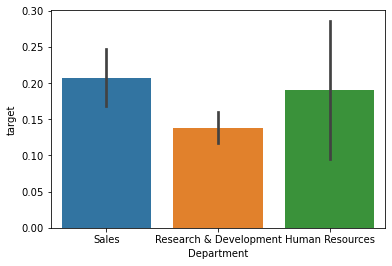

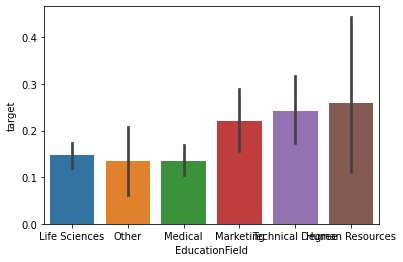

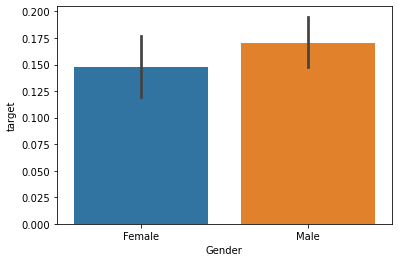

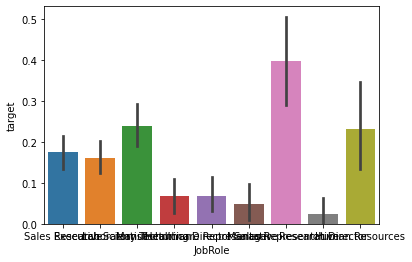

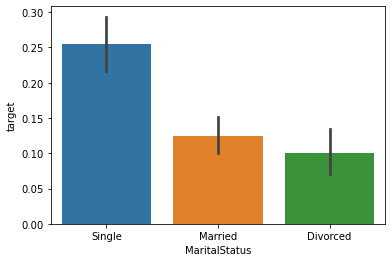

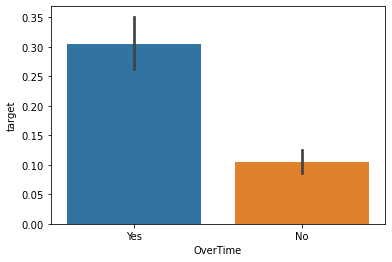

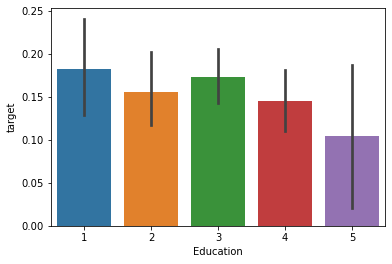

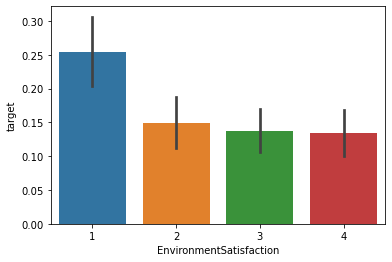

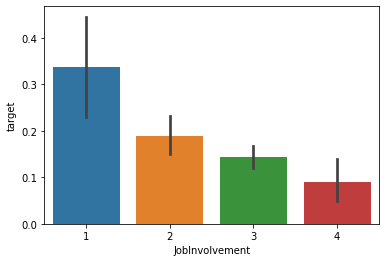

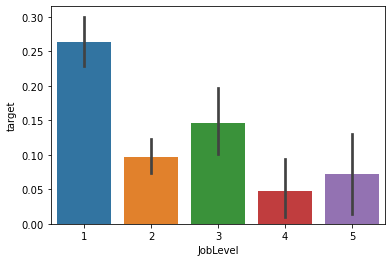

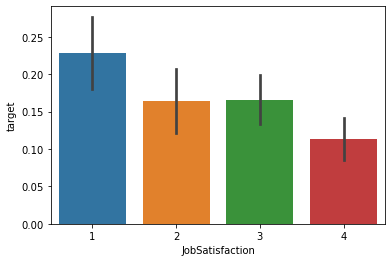

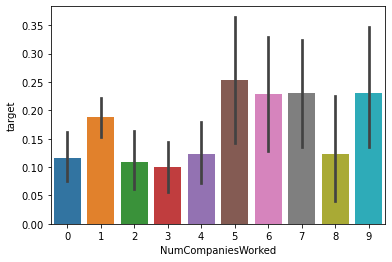

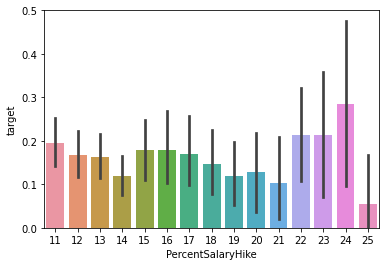

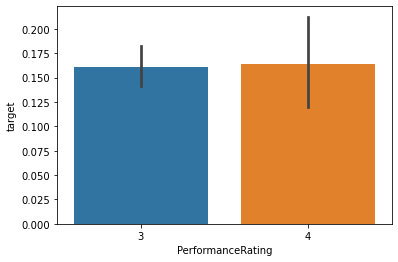

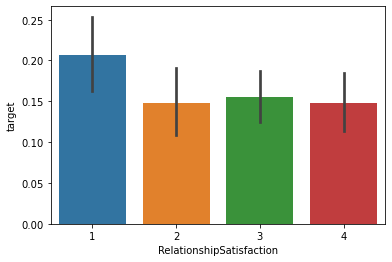

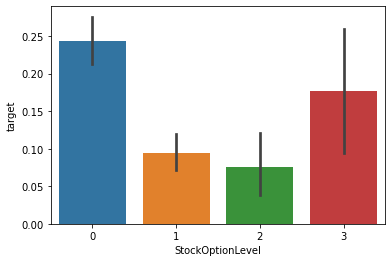

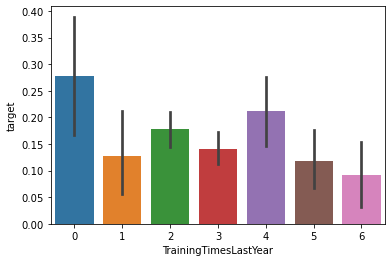

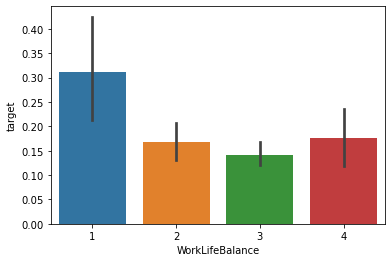

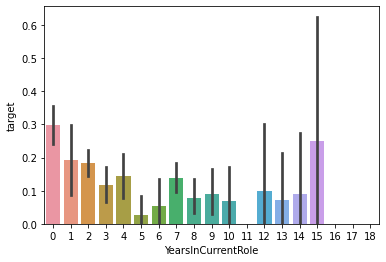

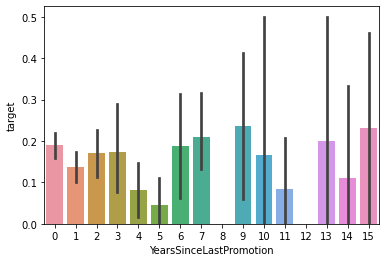

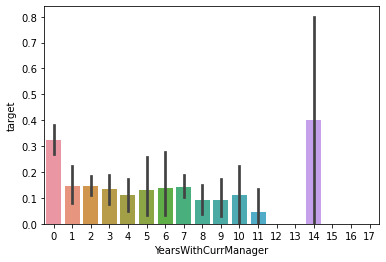

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [39]:
charlist=['Gender','Education','PerformanceRating']
char_1=char.drop(charlist,axis=1)

In [40]:
char_1.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [41]:
char_1['EnvironmentSatisfaction']=char_1['EnvironmentSatisfaction'].astype('object')
char_1['JobInvolvement']=char_1['JobInvolvement'].astype('object')
char_1['JobLevel']=char_1['JobLevel'].astype('object')
char_1['JobSatisfaction']=char_1['JobSatisfaction'].astype('object')
char_1['NumCompaniesWorked']=char_1['NumCompaniesWorked'].astype('object')
char_1['PercentSalaryHike']=char_1['PercentSalaryHike'].astype('object')
char_1['RelationshipSatisfaction']=char_1['RelationshipSatisfaction'].astype('object')
char_1['StockOptionLevel']=char_1['StockOptionLevel'].astype('object')
char_1['TrainingTimesLastYear']=char_1['TrainingTimesLastYear'].astype('object')
char_1['WorkLifeBalance']=char_1['WorkLifeBalance'].astype('object')
char_1['YearsInCurrentRole']=char_1['YearsInCurrentRole'].astype('object')
char_1['YearsSinceLastPromotion']=char_1['YearsSinceLastPromotion'].astype('object')
char_1['YearsWithCurrManager']=char_1['YearsWithCurrManager'].astype('object')

In [42]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(1470, 121)

In [43]:
X_char_dum.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Part 2 - Select K Best

In [44]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=110)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [120]:
#select_features_df_char.iloc[0]

# Creating the Master Feature Set for Model Development

In [45]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [47]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Attrition Rate in Training Data",y_train.mean())
print("Attrition Rate in Testing Data",y_test.mean())

Shape of Training Data (1029, 114)
Shape of Testing Data (441, 114)
Attrition Rate in Training Data target    0.162293
dtype: float64
Attrition Rate in Testing Data target    0.15873
dtype: float64


In [46]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [48]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

In [49]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 4, 'min_samples_split': 50}


In [50]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=4,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=20)

In [51]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=4,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_split=50, random_state=20)

In [52]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=4,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=4, min_samples_split=50,
                           random_state=20)

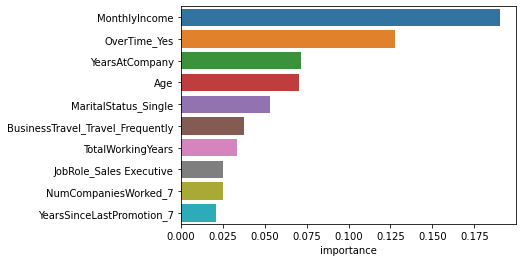

In [53]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)


ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

In [54]:
# Model Evaluation

y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

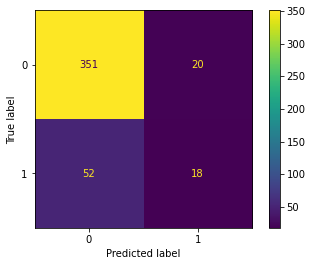

In [56]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [57]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8367346938775511
Precision 0.47368421052631576
Recall 0.2571428571428571
f1_score 0.3333333333333333


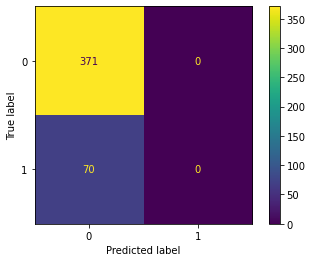

In [59]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8412698412698413
Precision 0.0
Recall 0.0
f1_score 0.0


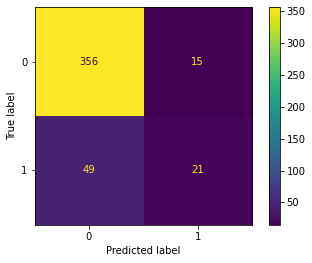

In [61]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.854875283446712
Precision 0.5833333333333334
Recall 0.3
f1_score 0.3962264150943397


In [ ]:
# Probability Decile Analysis

In [63]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_gbm']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_gbm')['target'].agg(['count','mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)

sorted_rank_df=rank_df_actuals.sort_values(by='P_Rank_gbm',ascending=False)
sorted_rank_df['N_events']=rank_df_actuals['count']*rank_df_actuals['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile,Lift_over_Avg
0,10,147,0.931973,137.0,137.0,0.578059,0.578059,10.0,10.0,0.008110,0.008110,0.5699,1,5.780591
1,9,147,0.462585,68.0,205.0,0.286920,0.864979,79.0,89.0,0.064071,0.072182,0.7928,2,2.869198
2,8,147,0.081633,12.0,217.0,0.050633,0.915612,135.0,224.0,0.109489,0.181671,0.7339,3,0.506329
3,7,147,0.040816,6.0,223.0,0.025316,0.940928,141.0,365.0,0.114355,0.296026,0.6449,4,0.253165
4,6,147,0.034014,5.0,228.0,0.021097,0.962025,142.0,507.0,0.115166,0.411192,0.5508,5,0.210970
5,5,147,0.027211,4.0,232.0,0.016878,0.978903,143.0,650.0,0.115977,0.527170,0.4517,6,0.168776
6,4,147,0.013605,2.0,234.0,0.008439,0.987342,145.0,795.0,0.117599,0.644769,0.3426,7,0.084388
7,3,147,0.006803,1.0,235.0,0.004219,0.991561,146.0,941.0,0.118410,0.763179,0.2284,8,0.042194
8,2,147,0.006803,1.0,236.0,0.004219,0.995781,146.0,1087.0,0.118410,0.881590,0.1142,9,0.042194
9,1,147,0.006803,1.0,237.0,0.004219,1.000000,146.0,1233.0,0.118410,1.000000,-0.0000,10,0.042194


<AxesSubplot:title={'center':'Gains Chart'}, xlabel='Decile', ylabel='cum_event_cap'>

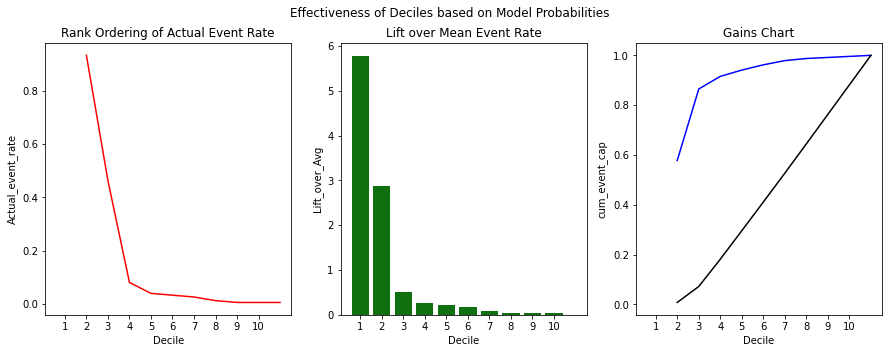

In [64]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='black')

In [65]:
# Audience
df['Predicted_cancel_Rank']=np.where(df['P_Rank_gbm']<8,"Bottom7","Top3")
df.Predicted_cancel_Rank.value_counts()

Bottom7    1029
Top3        441
Name: Predicted_cancel_Rank, dtype: int64

In [66]:
df_top3=df.loc[df['Predicted_cancel_Rank']=='Top3',:]

In [67]:
df_top3.shape

(441, 37)

In [68]:
df_top3['income_RANK']=pd.qcut(df_top3['MonthlyIncome'].rank(method='first').values,10,duplicates='drop').codes+1

In [69]:
df_top3.groupby('income_RANK')['MonthlyIncome'].agg(['min','mean','max'])

,min,mean,max
income_RANK,,,
1,1009,1636.800000,2074
2,2080,2212.181818,2335
3,2339,2430.636364,2587
4,2587,2715.090909,2853
5,2858,3141.500000,3464
6,3479,4051.340909,4537
7,4538,4953.545455,5454
8,5473,6527.659091,7991
9,8103,9398.250000,10325


In [70]:
df_top3.MonthlyIncome.mean()

5016.392290249433

In [71]:
df_top3['income_segment']=np.where(df_top3['income_RANK']>=8,"High Income","Low Income")
df_top3.income_segment.value_counts()

Low Income     309
High Income    132
Name: income_segment, dtype: int64

In [72]:
df_top3['tot_work_exp_rank']=pd.qcut(df_top3['TotalWorkingYears'].rank(method='first').values,10,duplicates='drop').codes+1

In [73]:
df_top3.groupby('tot_work_exp_rank')['TotalWorkingYears'].agg(['min','mean','max'])

,min,mean,max
tot_work_exp_rank,,,
1,0,0.822222,1
2,1,1.340909,2
3,2,3.409091,4
4,4,4.954545,6
5,6,6.272727,7
6,7,7.750000,9
7,9,9.545455,10
8,10,10.613636,13
9,13,15.409091,18


In [74]:
df_top3.TotalWorkingYears.mean()

8.519274376417233

In [75]:
df_top3['Work_Exp_Segment']=np.where(df_top3['tot_work_exp_rank']>=7,"High Work Exp","Low Work Exp")
df_top3.Work_Exp_Segment.value_counts()

Low Work Exp     265
High Work Exp    176
Name: Work_Exp_Segment, dtype: int64

In [76]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['TotalWorkingYears'],aggfunc='count')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,110,66
Low Work Exp,22,243


In [77]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['y_pred_P'],aggfunc='mean')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,0.368630,0.373748
Low Work Exp,0.404445,0.479587
